In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv(r"D:\Downloads\Funnel Analysis\Assignment\purchase.csv")

In [6]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


# Check Mising Value

In [7]:
df.isna().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [8]:
df.shape

(2633521, 8)

In [9]:
dm = df.dropna()

In [10]:
dm.shape

(420718, 8)

# Check Duplicated Data

In [12]:
dm.duplicated().sum()

500

In [13]:
dk = dm.drop_duplicates()

In [14]:
dk.duplicated().sum()

0

In [15]:
dk.isna().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

# Qucik Look Check

In [17]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420218 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     420218 non-null  object 
 1   order_id       420218 non-null  int64  
 2   product_id     420218 non-null  int64  
 3   category_id    420218 non-null  float64
 4   category_code  420218 non-null  object 
 5   brand          420218 non-null  object 
 6   price          420218 non-null  float64
 7   user_id        420218 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 28.9+ MB


In [20]:
dk.describe()

,order_id,product_id,category_id,price,user_id
count,4.202180e+05,4.202180e+05,4.202180e+05,420218.000000,4.202180e+05
mean,2.370471e+18,1.676785e+18,2.274299e+18,254.224549,1.515916e+18
std,2.013711e+16,3.171342e+17,2.438441e+16,321.210113,2.370270e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18
25%,2.354504e+18,1.515966e+18,2.268105e+18,39.330000,1.515916e+18
50%,2.375431e+18,1.515966e+18,2.268105e+18,138.870000,1.515916e+18
75%,2.388441e+18,1.515966e+18,2.268105e+18,347.200000,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,11574.050000,1.515916e+18


In [24]:
dk[dk.select_dtypes("object").columns].describe().transpose()

,count,unique,top,freq
event_time,420218,324438,1970-01-01 00:33:40 UTC,828
category_code,420218,123,electronics.smartphone,102211
brand,420218,570,samsung,89879


In [31]:
dk.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
10,2020-04-26 14:55:26 UTC,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18


# Cohort Analysis 

**For cohort analysis, there are a few labels that we have to create:**
- Invoice period: A string representation of the year and month of a single transaction/invoice.
- Cohort group: A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
- Cohort period / Cohort Index: A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.



In [33]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420218 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     420218 non-null  object 
 1   order_id       420218 non-null  int64  
 2   product_id     420218 non-null  int64  
 3   category_id    420218 non-null  float64
 4   category_code  420218 non-null  object 
 5   brand          420218 non-null  object 
 6   price          420218 non-null  float64
 7   user_id        420218 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 28.9+ MB


In [42]:
dk['tanggal'] = pd.to_datetime(dk['event_time'])

C:\Users\Maxxi\AppData\Local\Temp\ipykernel_8056\462999826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['tanggal'] = pd.to_datetime(dk['event_time'])


In [44]:
dk['Date order'] = dk['tanggal'].dt.date

C:\Users\Maxxi\AppData\Local\Temp\ipykernel_8056\2581007626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['Date order'] = dk['tanggal'].dt.date


In [46]:
dk['Date order'] = pd.to_datetime(dk['Date order'])

C:\Users\Maxxi\AppData\Local\Temp\ipykernel_8056\3967288500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['Date order'] = pd.to_datetime(dk['Date order'])


In [47]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420218 entries, 0 to 2633520
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     420218 non-null  object             
 1   order_id       420218 non-null  int64              
 2   product_id     420218 non-null  int64              
 3   category_id    420218 non-null  float64            
 4   category_code  420218 non-null  object             
 5   brand          420218 non-null  object             
 6   price          420218 non-null  float64            
 7   user_id        420218 non-null  float64            
 8   tanggal        420218 non-null  datetime64[ns, UTC]
 9   Date order     420218 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 35.3+ MB


In [48]:
dk = dk.drop(['tanggal'], axis = 1)

In [51]:
dk.columns

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id', 'Date order'],
      dtype='object')

In [54]:
dk['Date order']

0         2020-04-01
2         2020-04-01
5         2020-04-01
6         2020-04-01
10        2020-04-01
             ...    
2633515   2020-11-01
2633516   2020-11-01
2633517   2020-11-01
2633518   2020-11-01
2633520   2020-11-01
Name: Date order, Length: 420218, dtype: datetime64[ns]

In [56]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
dk['Date order'] = dk['Date order'].apply(get_month)
grouping = dk.groupby('user_id')['Date order']
dk['CohortMonth'] = grouping.transform('min')
dk.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,Date order,CohortMonth
2633515,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18,2020-11-01,2020-11-01
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-01,2020-11-01
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-01,2020-11-01
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-01,2020-11-01
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,2020-11-01,2020-11-01


In [57]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(dk,'Date order')
cohort_year,cohort_month,_ = get_month_int(dk,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

dk['CohortIndex'] = year_diff * 12 + month_diff

In [58]:
dk

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,Date order,CohortMonth,CohortIndex
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-01,2020-04-01,0
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-01,2020-04-01,0
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-01,2020-04-01,0
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-01,2020-04-01,0
10,2020-04-26 14:55:26 UTC,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,2020-04-01,2020-04-01,0
...,...,...,...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18,2020-11-01,2020-11-01,0
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-01,2020-11-01,0
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-01,2020-11-01,0
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-01,2020-11-01,0


In [60]:
#Count monthly active customers from each cohort
df_temp = dk.copy()
df_temp['CohortMonth'] = df_temp['CohortMonth'].apply(lambda row:row.strftime('%Y-%m'))
grouping = df_temp.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)



In [61]:
cohort_data

CohortMonth  CohortIndex
1970-01      0               130
             600              32
             601              32
             602              31
             603              28
                            ... 
2020-09      1              1579
             2               674
2020-10      0              5771
             1               803
2020-11      0              2959
Name: user_id, Length: 78, dtype: int64

In [63]:
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='user_id')
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
CohortMonth,,,,,,,,,,,,,,,,,,,,,
1970-01,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,31.0,28.0,49.0,39.0,48.0,57.0,40.0,24.0,17.0
2020-01,1399.0,444.0,386.0,338.0,539.0,537.0,488.0,534.0,478.0,296.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,1376.0,386.0,285.0,496.0,508.0,484.0,493.0,430.0,264.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,1389.0,313.0,546.0,517.0,457.0,509.0,446.0,270.0,176.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04,3765.0,849.0,572.0,788.0,789.0,588.0,383.0,206.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05,13031.0,1719.0,2166.0,2170.0,1433.0,854.0,455.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06,8418.0,1838.0,1585.0,1045.0,673.0,379.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,21523.0,4731.0,2103.0,1277.0,628.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,22490.0,3097.0,1843.0,989.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
CohortMonth,,,,,,,,,,,,,,,,,,,,,
1970-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,23.8,21.5,37.7,30.0,36.9,43.8,30.8,18.5,13.1
2020-01,100.0,31.7,27.6,24.2,38.5,38.4,34.9,38.2,34.2,21.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,100.0,28.1,20.7,36.0,36.9,35.2,35.8,31.2,19.2,15.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,100.0,22.5,39.3,37.2,32.9,36.6,32.1,19.4,12.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04,100.0,22.5,15.2,20.9,21.0,15.6,10.2,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05,100.0,13.2,16.6,16.7,11.0,6.6,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06,100.0,21.8,18.8,12.4,8.0,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,22.0,9.8,5.9,2.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,100.0,13.8,8.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


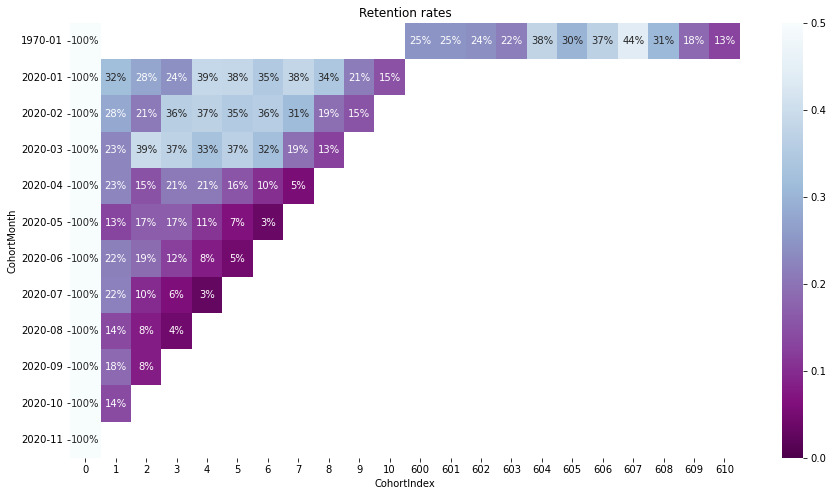

In [65]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()